In [1]:
import numpy as np
import operator

In [2]:
#算法核心代码
def classify(test_X,train_X,labels,k):
    train_X_length=train_X.shape[0]#获取训练集长度
    new_test=np.tile(test_X,(train_X_length,1))#重构测试数据，变成与训练数据长度相同
    sub_train_test=new_test-train_X#因为长度相同，做减法获得与训练数据的差值
    squared_sub=sub_train_test**2#对差值求平方
    sq_distances=squared_sub.sum(axis=1)#行方向上求和计算各个分量平方和
    distances=sq_distances**0.5 #开方求得测试数据与训练数据欧氏距离
    sorted_dist=distances.argsort()#返回计算的distances从小到大排序后的索引值。例如：[4,5,1,3]--->[1,3,4,5]-->[2,3,0,1]
    class_count={} #定义一个储存类别及其出现次数的字典
    for i in range(k):
        
        topk_label=labels[sorted_dist[i]]#取出前k个元素的类别
        class_count[topk_label]=class_count.get(topk_label,0)#计算类别出现的次数
    sorted_class_count=sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)   #根据字典的值对与之相应的键进行排序，指定reverse为True,意味着降序排列，不指定reverse参数默认升序。
    return sorted_class_count[0][0]#返回出现次数最多的类别，即分类的类别

### 电影类型分类

In [3]:
#创建数据
def creat_data():
    group=np.array([[1,101],[5,89],[108,5],[115,8]])
    labels=["爱情片","爱情片","动作片","动作片"]
    return group,labels

In [4]:
if __name__=="__main__":
    group,labels=creat_data()
    test_data=[10,150]
    pred_class=classify(test_data,group,labels,3)
    print(pred_class)

爱情片


### 约会网站配对效果判定

In [5]:
def file_to_matrix(filename):
    open_file=open(filename)#打开文件
    array_lines=open_file.readlines()#读取文件内容
    nums_lines=len(array_lines)#得到总行数
    data_matrix=np.zeros((nums_lines,3))#初始化数据矩阵为0，行数为读取的总行数，列数为去掉标签列的列数
    labels=[]#初始化标签数据，列表储存
    index=0#初始化循环的起始点
    for line in array_lines:
        line=line.strip()#参数为空，默认删除空白符
        rowofline=line.split("\t")#将每行按“\t”切片
        data_matrix[index,:]=rowofline[0:3]#将每行的前3个值存储到数据矩阵中，这里3与前面初始化的数据矩阵列数一致
        
        #不同标签赋值
        if rowofline[-1]=="didntLike":
            labels.append(1)
        if rowofline[-1]=="smallDoses":
            labels.append(2)
        if rowofline[-1]=="largeDoses":
            labels.append(3)
        index+=1 #当数据矩阵被填满时自动跳出循环，故不设定index的跳出条件
    return data_matrix,labels


In [30]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#数据可视化
def data_performance(train_X,label):
    font=FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=14)#设置中文字体
    fig,ax=plt.subplots(2,2,sharex=False,sharey=False,figsize=(12,8))#定义2*2的画布，设置画布大小
    num_labels=len(label)#获取类别个数
    label_color=[]
    #根据不同类别定义颜色
    for i in label:
        if i==1:
            label_color.append("black")
        if i==2:
            label_color.append("orange")
        if i==3:
            label_color.append("red")
    ，        
    ax[0][0].scatter(train_X[:,0],train_X[:,1],color=label_color,s=15,alpha=.5)
    ax[0][0].set_title(u"飞行常客里程数与玩游戏消耗时间比例",FontProperties=font)
    ax[0][0].set_xlabel(u"里程数",FontProperties=font)
    ax[0][0].set_ylabel(u"玩游戏时间占比",FontProperties=font)
    
    ax[0][1].scatter(train_X[:,0],train_X[:,2],color=label_color,s=15,alpha=.5)
    ax[0][1].set_title(u"飞行常客里程数与消费冰激凌数",FontProperties=font)
    ax[0][1].set_xlabel(u"里程数",FontProperties=font)
    ax[0][1].set_ylabel(u"消费冰激凌",FontProperties=font)
    
    ax[1][0].scatter(train_X[:,1],train_X[:,2],color=label_color,s=15,alpha=.5)
    ax[1][0].set_title(u"玩游戏时间比例与消费冰激凌数",FontProperties=font)
    ax[1][0].set_xlabel(u"玩游戏时间占比",FontProperties=font)
    ax[1][0].set_ylabel(u"消费冰激凌数",FontProperties=font)
    
    
    #设置图例
    didnLike=mlines.Line2D([],[],color="black",marker=".",markersize=6,label="didnLike")
    smallDoses=mlines.Line2D([],[],color="orange",marker=".",markersize=6,label="smallDoses")
    largeDoses=mlines.Line2D([],[],color="red",marker=".",markersize=6,label="largeDoses")
    
    #添加图例
    ax[0][0].legend(handles=[didnLike,smallDoses,largeDoses])
    ax[0][1].legend(handles=[didnLike,smallDoses,largeDoses])
    ax[1][0].legend(handles=[didnLike,smallDoses,largeDoses])
    
    plt.show()

In [28]:
#数据归一化
def Norm_to_1(dataset):
    col_min=dataset.min(0)#min(0)为按列取最小
    col_max=dataset.max(0)#max(0)为按列取最大
    based_standard=col_max-col_min#计算极差值
    normed_dataset=np.zeros(np.shape(dataset)) #初始化标准化后数据矩阵
    len_normed_data=dataset.shape[0]
    
    normed_dataset=dataset-np.tile(col_min,(len_normed_data,1))#为计算差值将最小值扩展成与数据矩阵相同形状
    normed_dataset=normed_dataset/np.tile(based_standard,(len_normed_data,1))#为计算最终的标准化的数据，将极差扩展成与数据矩阵相同形状
    return normed_dataset,based_standard,col_min
    

In [12]:
#分类器测试函数
def classifierTester():
    filename="datingTestSet.txt"
    test_X,label=file_to_matrix(filename)
    test_rate=0.10#测试集比例
    normed_test_data,_,col_min=Norm_to_1(test_X)
    normed_length=normed_test_data.shape[0]
    tested_length=int(normed_length*test_rate)#测试集长度
    error_stat=0.0
    
    for i in range(tested_length):
        classifier_res=classify(normed_test_data[i,:],normed_test_data[tested_length:normed_length,:],label[tested_length:normed_length],4) #0到tested_length的每一条记录作为测试集，tested_length后的数据作为训练集，对每条记录分类
       
    #打印分类结果与真实标签
        print("分类结果:%d\t真实类别:%d"%(classifier_res,label[i]))
    #统计分类错误个数    
        if classifier_res!=label[i]:
            error_stat+=1
    print("错误率:%f%%"%(error_stat/float(tested_length)*100))        

In [15]:
#根据输入一个三位特征进行实时分类
def classify_person():
    res_list=["讨厌","有些喜欢","非常喜欢"]
    gaming_percent=float(input("游戏时间百分比："))
    airport_miles=float(input("飞行里程数:"))
    custom_icecream=float(input("周消费冰激凌:"))
    
    filename="datingTestSet.txt"
    test_X,label=file_to_matrix(filename)
    normed_test,widths,col_min=Norm_to_1(test_X)
    input_data=np.array([gaming_percent,airport_miles,custom_icecream])
    normed_input_data=(input_data-col_min)/widths
    classify_res=classify(normed_input_data,test_X,label,3)
    print("你可能%s这个人"%(res_list[classify_res]))
    

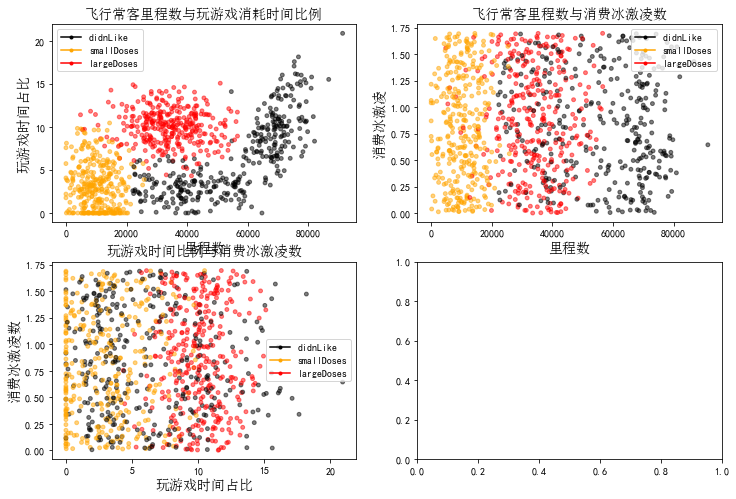

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

In [29]:
if __name__=="__main__":
    filename="datingTestSet.txt"
    test_X,label=file_to_matrix(filename)
    data_performance(test_X,label)
    
    classifierTester()
    
    classify_person()

### 手写数字分类

In [31]:
import numpy as np
import operator
from os import listdir

In [37]:
#图像转成向量

def img_to_vec(filename):
    init_vect=np.zeros((1,1024))
    open_file=open(filename)
    for i in range(32):
        line=open_file.readline()
        for j in range(32):
            init_vect[0,32*i+j]=int(line[j])
    return init_vect        

In [38]:
#手写数字分类测试
def handwritingTester():
    labels=[]
    train_file_list=listdir("trainingDigits")
    length_train=len(train_file_list)
    train_X=np.zeros((length_train,1024))
    for i in range(length_train):
        file_name=train_file_list[i]
        labelN=int(file_name.split("_")[0])
        labels.append(labelN)
        train_X[i,:]=img_to_vec("trainingDigits/%s"%(file_name))
    test_file_list=listdir("testDigits")
    error_stat=0.0
    length_test=len(test_file_list)
    for i in range(length_test):
        file_name=test_file_list[i]
        labelN=int(file_name.split("_")[0])
        test_X=img_to_vec("testDigits/%s"%(file_name))
        classify_res=classify(test_X,train_X,labels,3)
        print("分类结果为%d\t真是结果为%d"%(classify_res,labelN))
        if classify_res!=labelN:
            error_stat+=1
    print("总共错了%d个数据\n错误率为%f%%"%(error_stat,error_stat/length_test))        

In [39]:
if __name__=="__main__":
    handwritingTester()

分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0	真是结果为0
分类结果为0

分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6	真是结果为6
分类结果为6

### 从sklearn调用KNN实现手写数字分类

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNN

def img2vec(filename):
    vector=np.zeros((1,1024))
    open_file=open(filename)
    for i in range(32):
        line=open_file.readline()
        for j in range(32):
            vector[0,32*i+j]=int(line[j])
    return vector                

In [45]:
def handwritingclassify():
    label=[]
    file_list=listdir("trainingDigits")
    file_num=len(file_list)
    train_X=np.zeros((file_num,1024))
    #从文件解析训练集类别
    for i in range(file_num):
        file_name=file_list[i]
        labelN=int(file_name.split("_")[0])
        label.append(labelN)
        train_X[i,:]=img2vec("trainingDigits/%s"%(file_name))
    neighbor=KNN(n_neighbors=3,algorithm="auto")
    neighbor.fit(train_X,label)
    
    test_list=listdir("testDigits")
    error_stat=0.0
    test_file_num=len(test_list)
    
    for i in range(test_file_num):
        file_name=test_list[i]
        labelN=int(file_name.split("_")[0])
        test_X=img2vec("testDigits/%s"%(file_name))
        classify_res=neighbor.predict(test_X)
        print("分类结果为%d\t真实结果为%d"%(classify_res,labelN))
        if classify_res==labelN:
            error_stat+=1.0
    print("总共错了%d个数据\n错误率为%f%%"%(error_stat,error_stat/test_file_num))        

In [46]:
if __name__=="___main__":
    handwritingclassify()

In [47]:
handwritingclassify()

分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0	真实结果为0
分类结果为0

分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6	真实结果为6
分类结果为6